In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

# Setting seaborn style
sns.set(style='ticks', palette='colorblind', font_scale=1.5)

# Importing Data

In [2]:
# Importing Data from flat file - CSV
# Creating Pandas DataFrame from CSV
df = pd.read_csv('acquisitions_update_2021.csv')

In [3]:
# Retrieving Data using an API
url = 'https://logo.clearbit.com/:https://www.apple.com'
response = requests.get(url)
# Using conditional statement to check if the API request was succesfull
if response.status_code == 200:
    print('Success!')
else:
    print('An error has occurred.')

Success!


In [4]:
# Quick representation of data, ensuring all columns and data are present at beginning of DataFrame
df.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [5]:
# Quick representation of data, ensuring all columns and data are present at end of DataFrame
df.tail()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM
1454,1455,Citrix,2021,Mar,Wrike,Project management,United States,-,-,Citrix Workspace


In [6]:
# DataFrame information - 10 Columns, 1455 Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


# Preperation

In [7]:
# Sorting Data by Parent Company in alphabetical order, and by the most recent acquisitions
df = df.sort_values(by=["Parent Company", "Acquisition Year"], ascending = [True, False])
df.head(10)

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1255,1256,Adobe,2020,Nov,Workfront,-,-,1500000000,-,-
1254,1255,Adobe,2019,Jan,Allegorithmic,-,-,-,-,-
1250,1251,Adobe,2018,Apr,Sayspring,-,-,-,-,-
1251,1252,Adobe,2018,Apr,Uru,-,-,-,-,-
1252,1253,Adobe,2018,May,Magento,-,-,1680000000,-,-
1253,1254,Adobe,2018,Sep,Marketo,-,-,4750000000,-,-
1248,1249,Adobe,2016,May,Livefyre,-,-,-,-,-
1249,1250,Adobe,2016,Nov,TubeMogul,-,-,540000000,-,-
1246,1247,Adobe,2015,Jan,Fotolia,-,-,800000000,-,-
1247,1248,Adobe,2015,Jun,Mixamo,-,-,-,-,-


In [8]:
# Checking for duplicates: 1455 False = 1455 original rows, therefore no need to drop duplicates
df.duplicated(subset=['Acquired Company', "ID"]).value_counts()

False    1455
dtype: int64

In [9]:
# Further way of showing dropping of duplicates, with the resulting "test" dataframe having an equal number of rows to original DataFrame, therefore no duplicates were dropped
test = df.drop_duplicates(subset=['Acquired Company', "ID"])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 1255 to 124
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 125.0+ KB


In [10]:
# Setting ID as index, As I have confirmed each value for ID is unique
df = df.set_index("ID")

In [11]:
# Replacing missing Values 
# Chose this method as there was only 26% of acquisition prices present - therefore mean would not be an accurate fill, also replaced both "-" and "undisclosed" with 0 for consistency 
# Also allowing me to replace undisclosed with ease as it is not NaN
df = df.replace("-", 0)
df = df.replace("undisclosed", 0)
df.head(3)

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
ID,,,,,,,,,
1256,Adobe,2020,Nov,Workfront,0,0,1500000000,0,0
1255,Adobe,2019,Jan,Allegorithmic,0,0,0,0,0
1251,Adobe,2018,Apr,Sayspring,0,0,0,0,0


In [12]:
# Getting description of data in dataframe
df.describe()

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
count,1455,1455,1455,1455,1455,1455,1455,1455,1455
unique,14,47,13,1452,865,26,228,10,236
top,Microsoft,2014,Jun,Magento,0,0,0,0,0
freq,258,100,148,2,274,1114,1072,1445,1052


In [13]:
# Example of Grouping by business - using new DataFrame "df2" as original DataFrame has already been sorted as desired for analysis
df2 = df.groupby("Business")
df2.first()
# Displaying the Software group
df2.get_group("Software")

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
ID,,,,,,,,,
56,Apple,2013,Dec,Catch.com,Software,0,0,0,0
25,Apple,2006,Oct,Silicon Color,Software,0,0,0,0
26,Apple,2006,Dec,Proximity,Software,0,0,0,0
23,Apple,2005,Mar,SchemaSoft,Software,0,0,0,0
11,Apple,2000,Apr,Astarte-DVD Authoring Software,Software,0,0,0,0
12,Apple,2000,0,SoundJam MP,Software,0,0,0,0
8,Apple,1999,Jan,Xemplar Education,Software,0,4926000,0,0
1,Apple,1988,Mar,Network Innovations,Software,0,0,0,0
935,Blackberry,2009,Jan,Chalk Media,Software,0,23125000,0,0


# Analysis

In [14]:
# For loop used to display the percentage of rows that have 0 information in each column
for column in df.columns:
    percentage = (df[column] == 0).mean()
    print(f'{column}: {round(percentage*100, 2)}%')

Parent Company: 0.0%
Acquisition Year: 1.92%
Acquisition Month: 3.99%
Acquired Company: 0.0%
Business: 18.83%
Country: 76.56%
Acquisition Price: 73.68%
Category: 99.31%
Derived Products: 72.3%


In [15]:
# Converting Object to int64 for Acquisition Price and Acquisition Year Column as they are numeric values and can be used for calculations
df["Acquisition Price"] = pd.to_numeric(df["Acquisition Price"])
df["Acquisition Year"] = pd.to_numeric(df["Acquisition Year"])

print(df.dtypes)

Parent Company       object
Acquisition Year      int64
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price     int64
Category             object
Derived Products     object
dtype: object


## Analysis of money spent by Companies on Acquisitions

In [16]:
# NumPy functions to gain insights into the amount of money being spent on acquisitions, using the known prices available
print("The total money spent on acquisitions where the price was recorded was: $",df["Acquisition Price"].sum())
print("The highest recorded amount of money spent on a single acquisition was: $",df["Acquisition Price"].max())

# Creating a list of Acquisition Prices for ease of calculations
Prices = df["Acquisition Price"].tolist()
# Removing Acquistion Prices that weren't recorded (0)
Prices = [i for i in Prices if i != 0]
print("The lowest Acquisition Price that was recorded for a Company was: $",min(Prices))

# Python program to get average of a list
def Average(Prices):
    return sum(Prices) / len(Prices)

average = Average(Prices)
print("The average amount of money spent by companys with a recorded acquisition price was: $", round(average, ))

The total money spent on acquisitions where the price was recorded was: $ 519877989500
The highest recorded amount of money spent on a single acquisition was: $ 71300000000
The lowest Acquisition Price that was recorded for a Company was: $ 200000
The average amount of money spent by companys with a recorded acquisition price was: $ 1357383785


## Which Companies have had the highest number of Acquisitions?

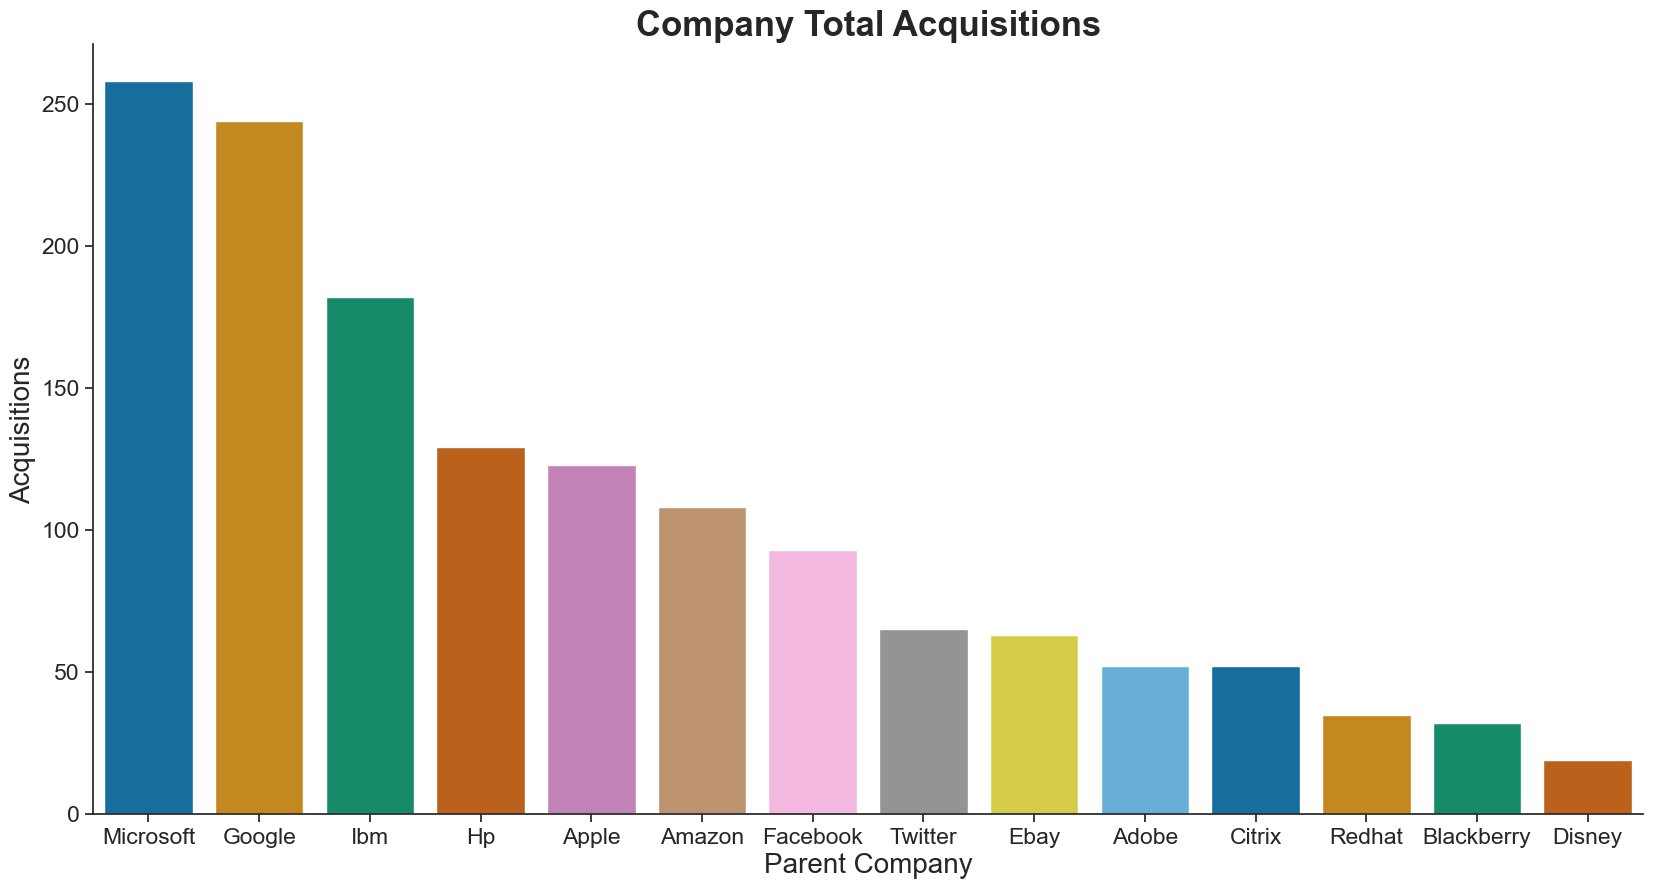

In [17]:
# Getting frequency of Parent Companys occuring in Dataframe as each occurence equals one acquisition
companies = df['Parent Company'].value_counts() 
# Converting companies series to DataFrame and renaming
companies_df = companies.to_frame().reset_index() 
companies_df = companies_df.rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)

# Plotting The Companies Total Acquisitions
plt.figure(figsize=(20,10))
sns.barplot(x='Parent Company', y='Acquisitions', data=companies_df, palette = "colorblind")
plt.title('Company Total Acquisitions', fontweight="bold", fontsize=25)
plt.xlabel('Parent Company', fontsize=20)
plt.ylabel('Acquisitions', fontsize=20)
sns.despine(trim=False)

## What are the most popular type of Businesses being acquired by both Apple and Microsoft?

In [18]:
# User-Defined Custom function for locating an inputed Value in the Parent Company Category
def my_function(Company):
    Company = df.loc[df["Parent Company"] == Company]
    return Company

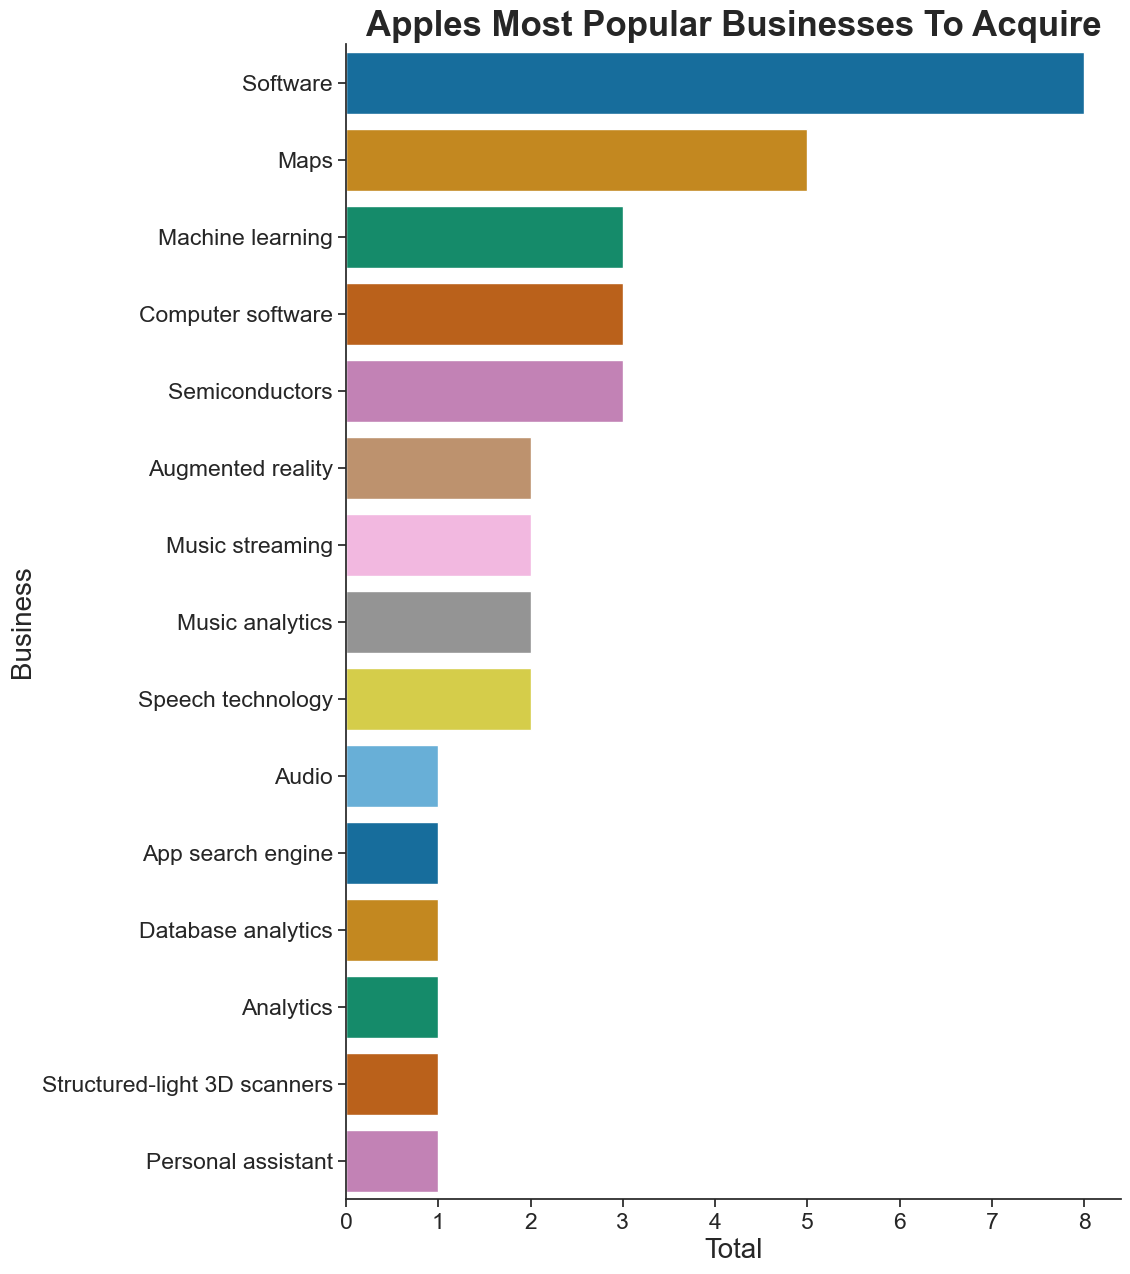

In [19]:
# Using custom function to locate data from Apple
Apple = my_function("Apple")
business = Apple['Business'].value_counts()
business_df = business.to_frame().reset_index()
business_df = business_df.rename({'index': 'Business', 'Business': 'Total'}, axis=1)

# Plotting What types of Businesses Apple is acquiring most of
plt.figure(figsize=(10,15))
sns.barplot(x='Total', y='Business', data=business_df[:15],palette = "colorblind")
plt.title('Apples Most Popular Businesses To Acquire', fontweight="bold", fontsize=25)
plt.xlabel('Total', fontsize=20)
plt.ylabel('Business', fontsize=20)
sns.despine(trim=False)

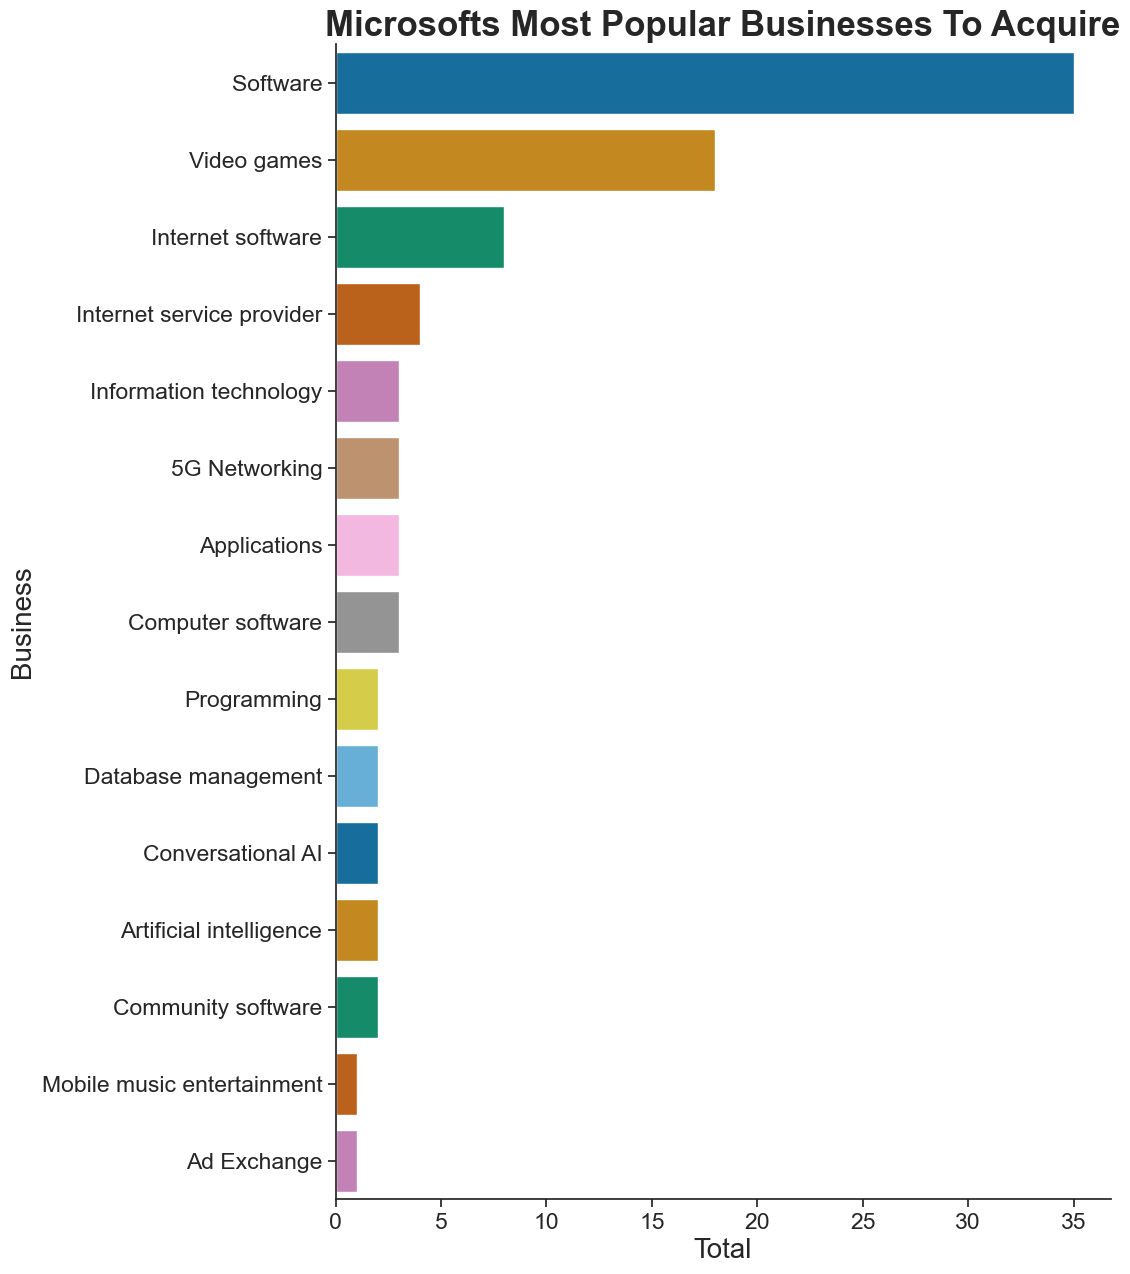

In [20]:
# Using custom function to locate data from Microsoft
Microsoft = my_function("Microsoft")
business2 = Microsoft['Business'].value_counts()
business_df2 = business2.to_frame().reset_index()
business_df2 = business_df2.rename({'index': 'Business', 'Business': 'Total'}, axis=1)

# Plotting What types of Businesses Microsoft is acquiring most of
plt.figure(figsize=(10,15))
sns.barplot(x='Total', y='Business', data=business_df2[:15], palette = "colorblind")
plt.title('Microsofts Most Popular Businesses To Acquire', fontweight="bold", fontsize=25)
plt.xlabel('Total', fontsize=20)
plt.ylabel('Business', fontsize=20)
sns.despine(trim=False)

In [21]:
# Looking at top 5 most popular businesses for Microsoft to acquire
business_df2.head()

,Business,Total
0,Software,35
1,Video games,18
2,Internet software,8
3,Internet service provider,4
4,Information technology,3


In [22]:
# Merging two DataFrames together
business_df.merge(business_df2,how='outer',left_on=['Business','Total'],right_on=['Business','Total'])

,Business,Total
0,Software,8
1,Maps,5
2,Machine learning,3
3,Computer software,3
4,Semiconductors,3
...,...,...
279,Data protection,1
280,Big data analytics,1
281,Mobile communications,1
282,Customer service software,1


In [23]:
# Concating two DataFrames Together - opting for only the top 5 most popular acquired businesses of both Apple and Microsoft
result = pd.concat([business_df.head(), business_df2.head()], keys=["Apple","Microsoft"])
result.index.names = ["Company","ID"]
result.sort_values("Total").max()
print(result)

                               Business  Total
Company   ID                                  
Apple     0                    Software      8
          1                        Maps      5
          2            Machine learning      3
          3           Computer software      3
          4              Semiconductors      3
Microsoft 0                    Software     35
          1                 Video games     18
          2           Internet software      8
          3   Internet service provider      4
          4      Information technology      3


Text(0.5, 1.0, 'Microsofts and Apples Most Popular Businesses To Acquire')

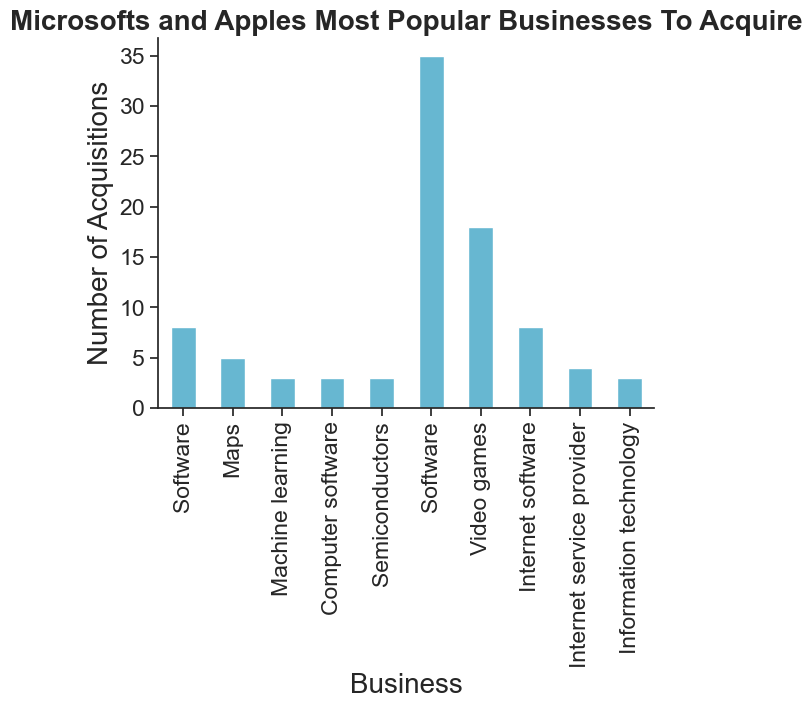

In [24]:
# Barchart displaying the top 5 most popular businesses acquired by both Apple and Microsoft
result.set_index("Business").plot(kind = "bar", stacked = True, color='#67B7D1', legend=False)
plt.xlabel('Business', fontsize=20)
plt.ylabel('Number of Acquisitions',  fontsize=20)
sns.despine(trim=False)
plt.title('Microsofts and Apples Most Popular Businesses To Acquire', fontweight="bold", fontsize=20)

### <font color='red'>*Code displaying Failed attempts at stacked bar chart - Comparing Microsoft and Apples most popular businesses to acquire*

In [25]:
#sns.barplot(data = result, x= "Business", y = "Total", )
#plt.figure(figsize=(15,30))
#plt.show()


#result.transpose().plot("Total",title="Test")

In [26]:
#fig = plt.figure()

#for frame in [business_df, business_df2]:
   # plt.plot(frame['Total'], frame['Business'])
     #sns.barplot(x="Business", y="Total", 
            #   data=frame)
#g.fig.set_size_inches(15, 8)
   # plt.show()
#plt.xlim(0,20)
#plt.ylim(0,30)
#plt.show()

In [27]:
#business_df["key"] = "Apple"
#business_df2["Key"] = "Microsoft"
#result = pd.concat([business_df.head(), business_df2.head()], keys=["Apple","Microsoft"])
#DFGroup = result.groupby(["Business", "Key"])
#DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

In [28]:
#g = sns.barplot(x="Business", y="Total", 
               #data=pd.concat([business_df, business_df2], keys=["Apple","Microsoft"]), fit_reg=True)
#g.fig.set_size_inches(15, 8)
#plt.show()

## What is the average amount each Company is spending on an Acquisition?

In [29]:
# Table to show the average amount of money each company spends on an Acquisition - grouped by Parent Company
companies_grouped = df.groupby(["Parent Company"]).mean()
companies_grouped = companies_grouped.reset_index()
companies_grouped

,Parent Company,Acquisition Year,Acquisition Price
0,Adobe,2006.365385,3.208220e+08
1,Amazon,2011.592593,3.039426e+08
2,Apple,2011.837398,4.260997e+07
3,Blackberry,2010.312500,7.559766e+07
4,Citrix,2009.192308,0.000000e+00
5,Disney,1996.368421,5.996088e+09
6,Ebay,2008.317460,2.282381e+08
7,Facebook,2014.258065,2.609108e+08
8,Google,2012.188525,3.468934e+07
9,Hp,1565.806202,5.894913e+08


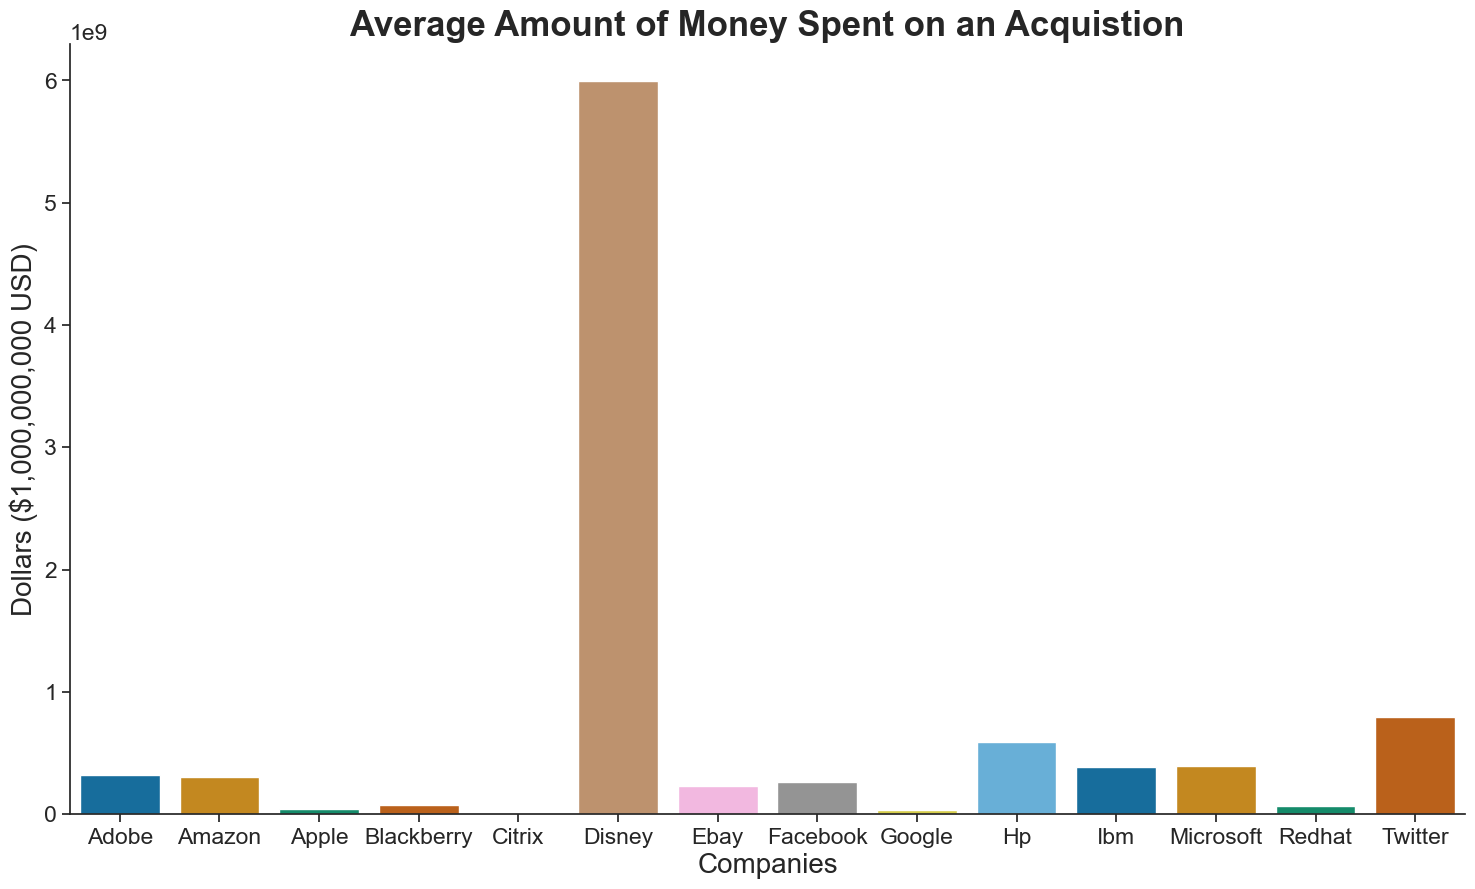

In [30]:
# Graph displaying the average amount of money spent on acquisitions
plt.figure(figsize=(18,10))
sns.barplot(x= "Parent Company", y='Acquisition Price', data=companies_grouped,  fill=True, palette = "colorblind")
plt.title('Average Amount of Money Spent on an Acquistion', fontweight="bold", fontsize=25)
plt.xlabel('Companies', fontsize=20)
plt.ylabel('Dollars ($1,000,000,000 USD)', fontsize=20)
sns.despine(trim=False)

plt.show()

In [31]:
# Removing Disney as the average money spent on an aquistion is much larger than the other companies
companies_grouped2 = companies_grouped[companies_grouped["Acquisition Price"] < 3000000000]
companies_grouped2 = companies_grouped2.reset_index()

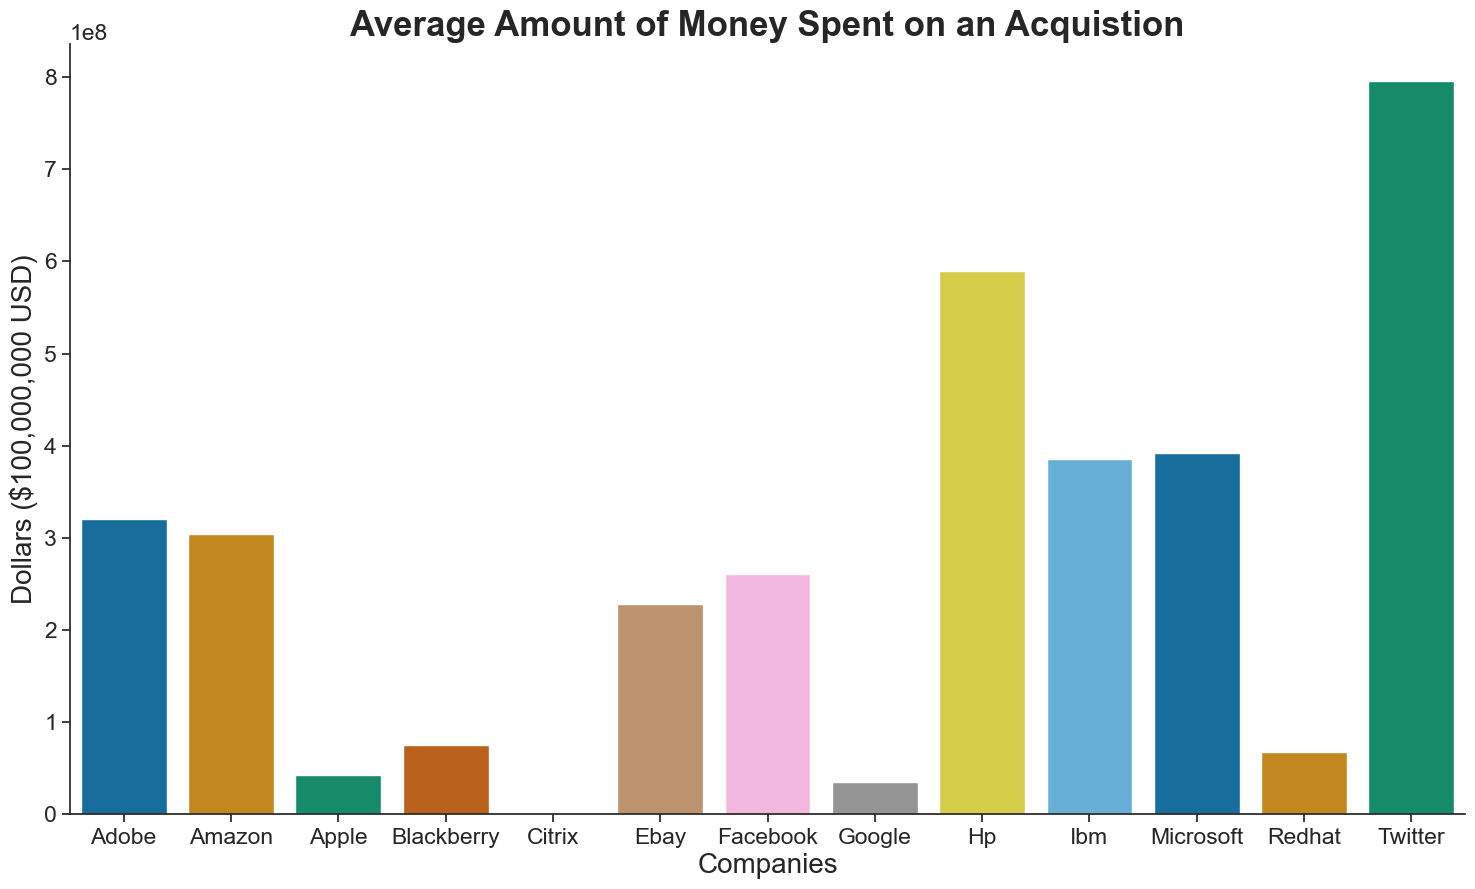

In [32]:
# Graph displaying the average amount of money spent on acquisitions excluding Disney
plt.figure(figsize=(18,10))
sns.barplot(x= "Parent Company", y='Acquisition Price', data=companies_grouped2,  fill=True, palette = "colorblind")
plt.title('Average Amount of Money Spent on an Acquistion', fontweight="bold", fontsize=25)
plt.xlabel('Companies', fontsize=20)
plt.ylabel('Dollars ($100,000,000 USD)', fontsize=20)
sns.despine(trim=False)

plt.show()

## Is there Particular Months/Fiscal Quarters where more Acquisitions take place?

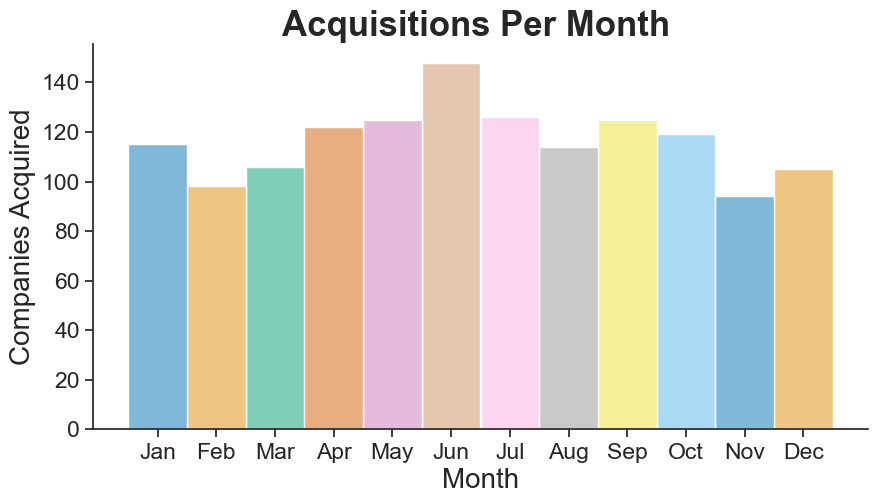

In [33]:
# Graph displaying the number of acquisitions that occured each month
df['Acquisition Month'] = pd.Categorical(df['Acquisition Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Acquisition Month", hue="Acquisition Month", 
             legend=False, palette = "colorblind")
plt.title("Acquisitions Per Month ",
          fontsize=25, fontweight="bold")
plt.xlabel("Month", fontsize=20)
plt.ylabel("Companies Acquired", fontsize=20)
sns.despine(trim=False)

In [34]:
# Creating a map to categorise each month into their respective fiscal quarters
quarter_map = {'Jan':1,'Feb':1,'Mar':1,'Apr':2,'May':2,'Jun':2,'Jul':3,'Aug':3,'Sep':3,'Oct':4,'Nov':4,'Dec':4}
df['Quarter'] = df['Acquisition Month'].map(quarter_map)
quarterly_acquisition_counts = df.groupby(['Quarter']).size()

# Table displaying the number of acquisitions that occured each fiscal quarter
quarterly_acquisition_counts

Quarter
1.0    319
2.0    395
3.0    365
4.0    318
dtype: int64

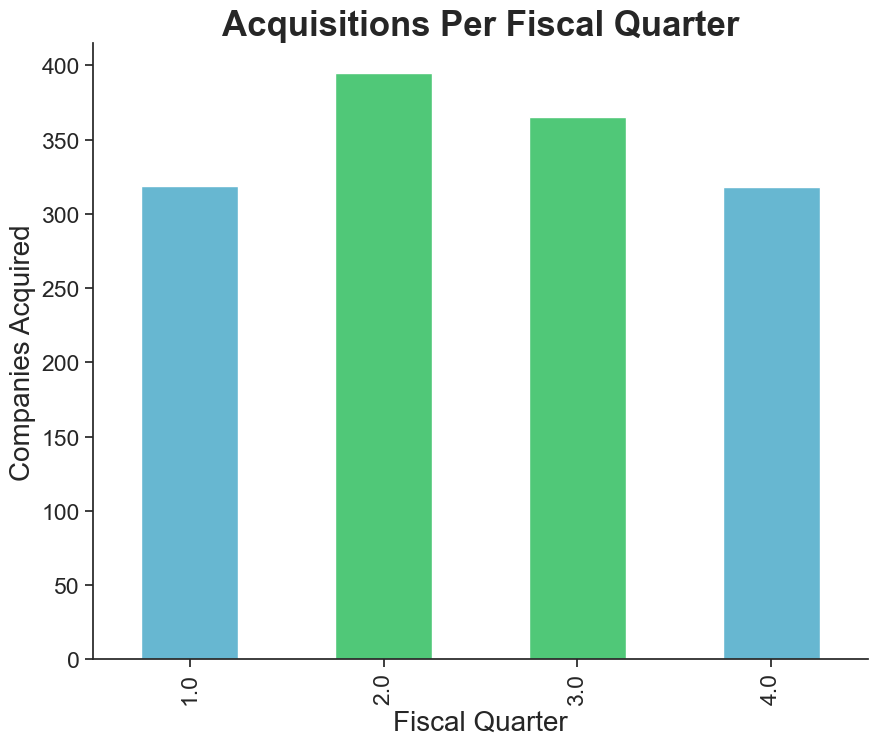

In [35]:
# Setting Colours
c = ['#67B7D1', '#50C878', '#50C878', '#67B7D1']

# Graph displaying the number of acquisitions that occured each fiscal quarter
plt.figure(figsize=(10, 8))
quarterly_acquisition_counts.plot(kind='bar', color=c)
plt.title('Acquisitions Per Fiscal Quarter',  fontsize=25, fontweight="bold")
plt.xlabel('Fiscal Quarter', fontsize=20)
plt.ylabel('Companies Acquired', fontsize=20)
sns.despine(trim=False)
plt.show()

## How many Acquisitions take place each year?

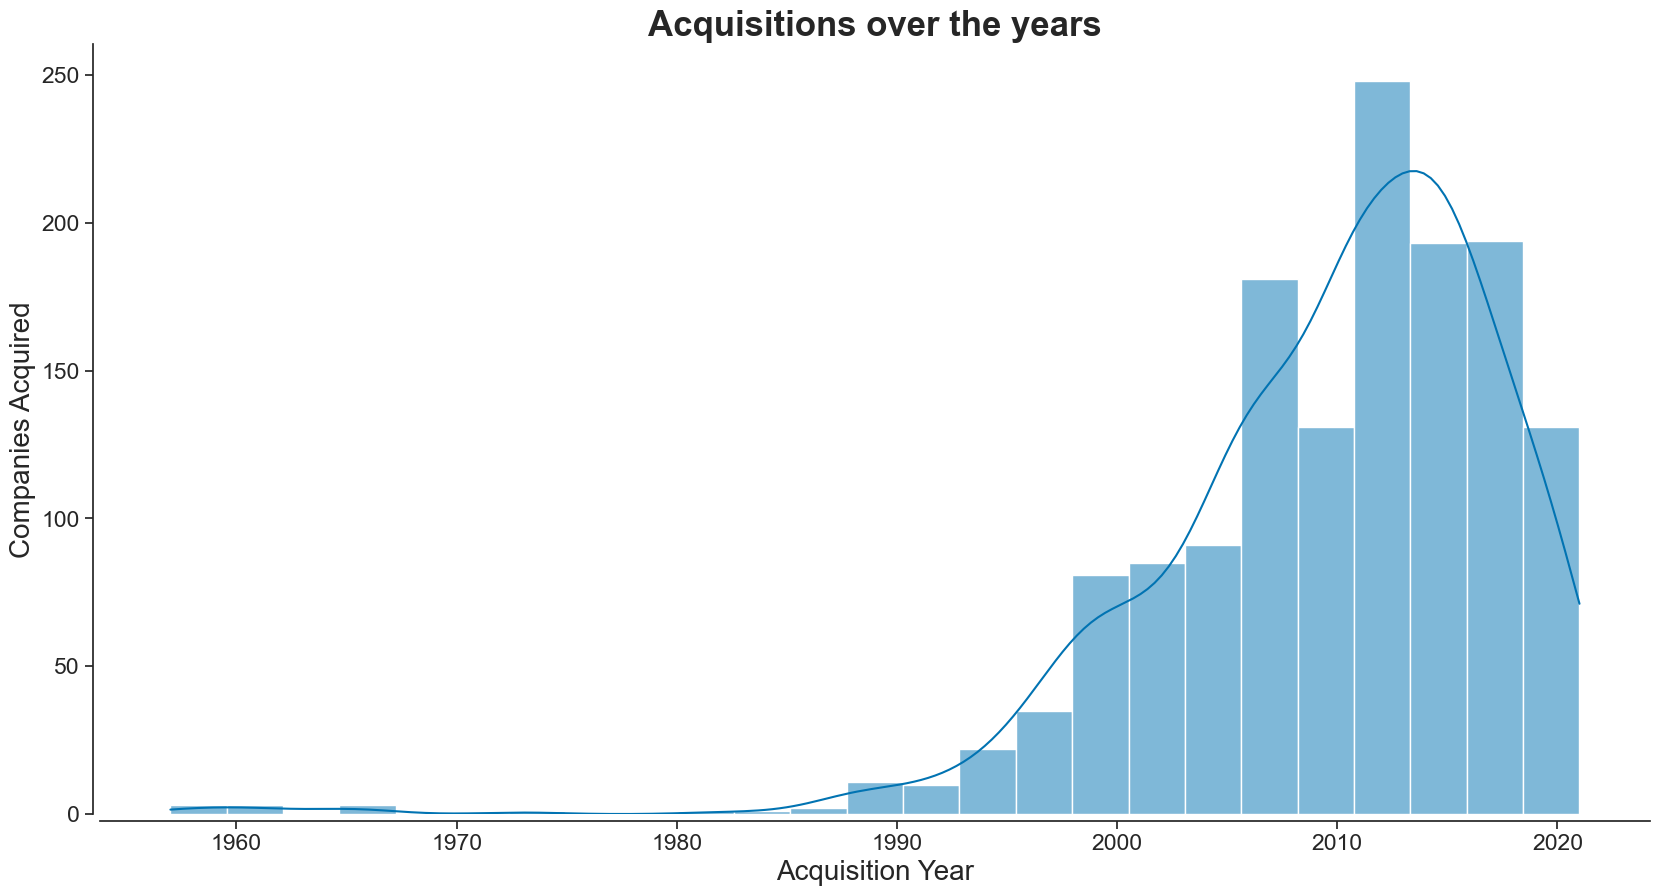

In [36]:
# Replacing missing years with NaN so they are not included in plot
df['Acquisition Year'] = df['Acquisition Year'].replace({0:np.nan}) 

# Graph showing the amount of acquistions that have taken place each year
plt.figure(figsize=(20, 10))
plt.title("Acquisitions over the years", fontsize=25, fontweight="bold")
plt.xlabel("Acquisition Year", fontsize=20)
plt.ylabel("Companies Acquired", fontsize=20)
sns.histplot(data=df, x="Acquisition Year", kde=True, bins=25)
sns.despine(offset=5, trim=False)

## How many Acquisitions of Aritifical Intelligence Businesses take place each year?

In [37]:
# Replacing all AI related fields with generic 'AI' value - to see if there has been an increase in AI related acquisitions in recent years
AI = df.replace({'Business':{"Artificial intelligence/voice assistant":"AI", "Podcast A.I.":"AI", "Core AI startup":"AI", "AI-powered digital marketing":"AI","Artificial intelligence":"AI",
                      "AI-powered scheduling assistant service":"AI","Conversational AI":"AI","Industrial AI platform":"AI"}})
AI = AI[AI["Business"] == "AI"]
# Counting the total number of Artificial Intelligence Businesses that have been recored as being Acquired
print(AI["Business"].value_counts()["AI"])

14


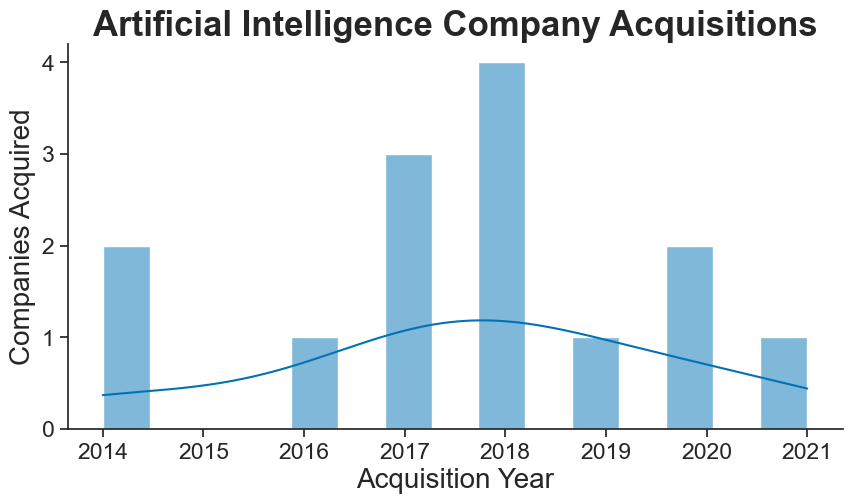

In [38]:
# Graph showing the amount of acquistions of Artificial Intelligence Businesses that have taken place each year
plt.figure(figsize=(10, 5))
plt.title("Artificial Intelligence Company Acquisitions", fontsize=25, fontweight="bold")
plt.xlabel("Acquisition Year", fontsize=20)
plt.ylabel("Companies Acquired", fontsize=20)
sns.histplot(data=AI, x="Acquisition Year", kde=True, bins=15)

sns.despine(trim=False)